<a href="https://colab.research.google.com/github/YixinFan11/Machine-Learning-in-Science-II/blob/master/Initialisation(MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

During back-propogation, it is important that gradients do not become either too small or too large as the algorithm progresses down to the lower layers. If the gradients become small, training will proceed at a much slower rate and may not converge. This is called the vanishing gradients problem. If the gradients become too large, the algorithm may diverge. This is called the exploding gradients problem, and is mostly encountered in recurrent neural networks.

To see why this can be a problem, consider a deep MLP with 100 hidden layers, each with 100 hidden units (setting the bias of each to zero for simplicity) and a sigmoid activation function. We assume the input data (also with dimension 100) and the weights are normally distributed with zero mean and unit variance, i.e. $\mathcal{N}(0, 1)$. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [4]:
hidden_units = 100

In [5]:
X = np.random.normal(size=(1000, hidden_units))

In [6]:
def test_initialisation(X, num_layers, activation, scale):
  a = np.copy(X)
  plt.figure(figsize=(15,10))
  for i in range(num_layers):
    W = np.random.normal(scale=scale, size=(hidden_units, hidden_units))
    z = np.matmul(a, W)
    a = np.copy(activation(z))
    if i % 20 == 0:
      ax = plt.subplot(2,2,1)
      _ = ax.hist(a.flatten(), label='Layer ' + str(i))
      ax.set_xlabel('$\Phi$', fontsize=14)
      ax = plt.subplot(2,2,2)
      _ = ax.hist(a.flatten() * (1 - a.flatten() ), label='Layer ' + str(i))
      ax.set_xlabel('$\Phi^{\prime}$', fontsize=14)
  plt.legend()
  plt.show()

The distribution of activations and their gradient after every 20th layer is shown below. The activations immediately saturate and the gradients become small. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


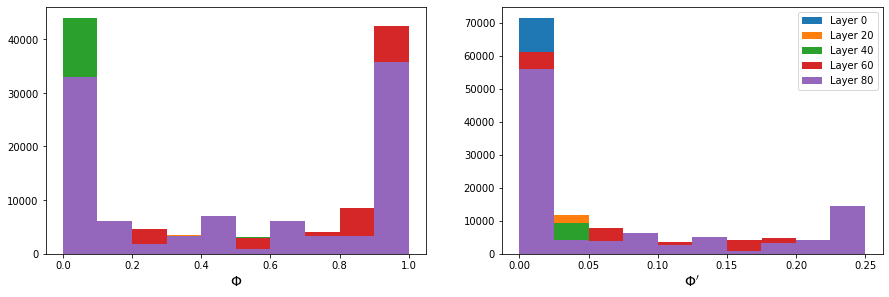

In [7]:
test_initialisation(X, 100, sigmoid, 1)

Ideally, we would to preserve the signal variance throughout the network, such that it neither dies out nor saturates. The variance of the output of a neuron should therefore be equal to the variance of its inputs. To understand how this can be achieved, consider the  input to the $i$th neuron in layer $\ell$

$
z^{(\ell)}_i =  \sum_{j=1}^{n_{\rm inputs}} a_j^{(\ell-1)} W_{ji}^{(\ell)} \,.
$

The variance of this is 

$
{\rm Var} [z^{(\ell)}_i ] =  \sum_{j=1}^{n_{\rm inputs}} {\rm Var}  [a_j^{(\ell-1)}] \, {\rm Var}[W_{ji}^{(\ell)}]\,,
$

which is equal to  $n_{\rm inputs} {\rm Var}  [a_j^{(\ell-1)}] \, {\rm Var}[W_{ji}^{(\ell)}]$ if the variance of each input is the same. 

In order for the variance out to be equal to the variance in, the variance of the weights should therefore by rescaled by $1 / n_{\rm inputs}$. During back-propogation, we would also like to preserve the gradient variance, which can be achieved by rescaling the variance of the weights by $1 / n_{\rm outputs}$, where $n_{\rm outputs}$ is the number of outputs from a neuron. A simple heuristic that balances both requirements is a weight initialisation of either 

$
W_{ij} \sim \mathcal{U} \left( -\sqrt{\frac{6}{n_{\rm inputs}+n_{\rm outputs}}},  \sqrt{\frac{6}{n_{\rm inputs}+n_{\rm outputs}}}\right)\,,
$

if the weights are initially drawn from a uniform distribution, and 

$
W_{ij} \sim \mathcal{N} \left( 0,  \sqrt{\frac{2}{n_{\rm inputs}+n_{\rm outputs}}}\right)\,,
$

if the initial weights are drawn from a normal distribution. Both are commonly used and give similar results. This initialisation strategy is called Xavier initialisation or  Glorot initialisation. 

The results of using Xavier initialisation are shown below. It can be seen that activations and their gradients retain similar variance throughout the the network.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


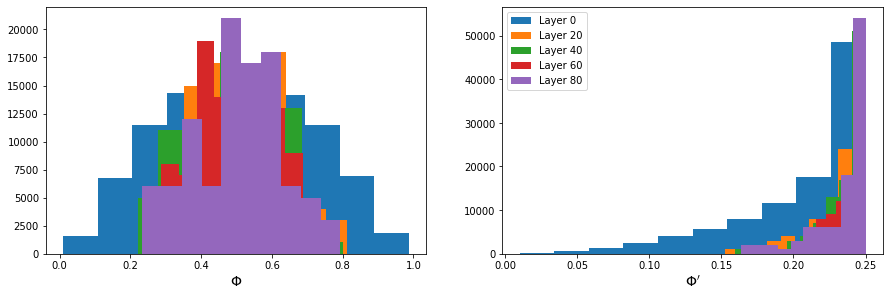

In [8]:
test_initialisation(X, 100, sigmoid, np.sqrt(1 / hidden_units))